In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# loading the dataset
df = pd.read_excel('Final_Train.xlsx')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
# some null values are present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [5]:
df['Qualification'].nunique()

1420

In [6]:
df['Experience'].nunique()

64

In [7]:
df['Experience'].value_counts()

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
65 years experience      1
61 years experience      1
60 years experience      1
58 years experience      1
64 years experience      1
Name: Experience, Length: 64, dtype: int64

In [8]:
df['Place'].nunique()

877

In [9]:
df['Place'].value_counts()

HSR Layout, Bangalore          75
Andheri West, Mumbai           70
Dwarka, Delhi                  67
Banjara Hills, Hyderabad       64
Mulund West, Mumbai            54
                               ..
JP Nagar 4 Phase, Bangalore     1
Film Nagar, Hyderabad           1
Vellakinar, Coimbatore          1
Domalguda, Hyderabad            1
Muvattupuzha, Ernakulam         1
Name: Place, Length: 877, dtype: int64

In [10]:
df['Profile'].nunique()

6

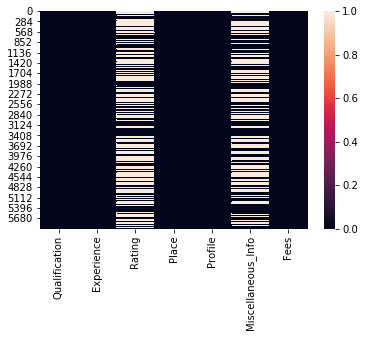

In [11]:
# plotting for null values
sns.heatmap(df.isna())

In [12]:
df[['Experience','Rating']].nunique()

Experience    64
Rating        51
dtype: int64

In [13]:
df['Rating'] = df['Rating'].str.strip('%')

In [14]:
# more than half of the values are null
df['Rating'].isna().value_counts()

True     3302
False    2659
Name: Rating, dtype: int64

In [15]:
# filling the null values for rating based on the experience
r = df['Rating'].dropna().astype('int64').groupby(df['Experience']).mean().sort_values()
r

Experience
52 years experience     58.000000
50 years experience     69.666667
48 years experience     70.333333
56 years experience     76.000000
45 years experience     84.250000
30 years experience     85.571429
43 years experience     86.750000
40 years experience     87.312500
47 years experience     88.200000
41 years experience     88.363636
38 years experience     88.538462
37 years experience     88.875000
33 years experience     88.923077
51 years experience     89.000000
36 years experience     90.071429
29 years experience     90.275862
42 years experience     90.833333
25 years experience     91.102564
31 years experience     91.130435
27 years experience     91.138889
39 years experience     91.583333
46 years experience     92.000000
58 years experience     92.000000
32 years experience     92.130435
0 years experience      92.166667
26 years experience     92.185185
44 years experience     92.250000
35 years experience     92.470588
34 years experience     92.666667
23 

In [16]:
df1 = pd.DataFrame(r,columns=['Rating'])
df1.reset_index(inplace=True)

In [17]:
df1.nunique()

Experience    55
Rating        54
dtype: int64

In [18]:
df.drop('Miscellaneous_Info',axis=1,inplace=True)

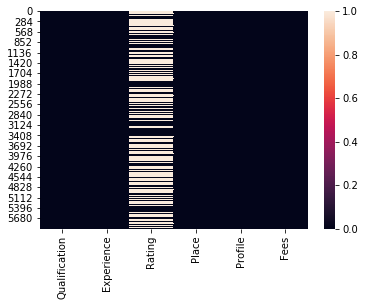

In [19]:
sns.heatmap(df.isna())

In [20]:
df['Rating'] = df['Rating'].dropna().astype('int64')

In [21]:
df['MRating'] = df.groupby('Experience')['Rating'].transform(lambda x: x.fillna(np.mean(x)))

In [22]:
df.drop('Rating',axis=1,inplace=True)

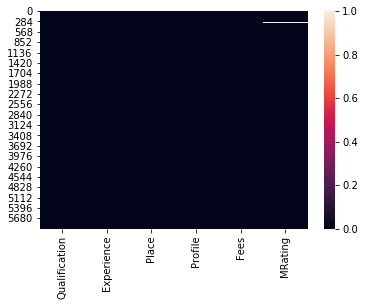

In [23]:
# still some null values are present
sns.heatmap(df.isna())

In [24]:
df[df['MRating'].isna()]

,Qualification,Experience,Place,Profile,Fees,MRating
110,"MRCPS, MBBS",60 years experience,"Old Rajendra Nagar, Delhi",General Medicine,100,NaN
325,"MBBS, MD - General Medicine",54 years experience,"Dadar East, Mumbai",General Medicine,200,NaN
372,"MBBS, Diploma in Otorhinolaryngology (DLO)",66 years experience,"Greams Road, Chennai",ENT Specialist,100,NaN
2062,MBBS,61 years experience,"Goregaon West, Mumbai",General Medicine,100,NaN
2262,MBBS,59 years experience,"Tilak Nagar, Mumbai",General Medicine,200,NaN
2631,"MBBS, DGO, MD - Obstetrics & Gynaecology",54 years experience,"Kumarapuram, Thiruvananthapuram",General Medicine,500,NaN
3493,MBBS,54 years experience,"Kaloor, Ernakulam",General Medicine,200,NaN
3608,"MBBS, MD - General Medicine",54 years experience,"Saibaba Colony, Coimbatore",General Medicine,200,NaN
3960,"MBBS, MD - Medicine",57 years experience,"Qutab Institutional Area, Delhi",General Medicine,100,NaN
4344,MBBS,54 years experience,"Royapuram, Chennai",General Medicine,100,NaN


In [25]:
df['MRating'].mean()

94.57654118659542

In [26]:
# filling the null values with mean of modified rating
df.fillna(df['MRating'].mean(),inplace=True)

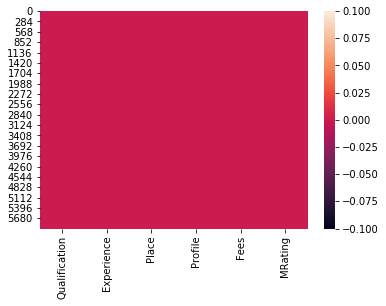

In [27]:
sns.heatmap(df.isna())

In [28]:
df['Fees'].value_counts()

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
# transforming the object and string data type to categorical values
le = LabelEncoder()
df['Qualification'] = le.fit_transform(df['Qualification'].astype(str).values.reshape(-1,1))
df['Experience'] = le.fit_transform(df['Experience'].astype(str).values.reshape(-1,1))
df['Place'] = le.fit_transform(df['Place'].astype(str).values.reshape(-1,1))
df['Profile'] = le.fit_transform(df['Profile'].astype(str).values.reshape(-1,1))

C:\Users\abhishek30april\ANACONDA\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
df

,Qualification,Experience,Place,Profile,Fees,MRating
0,401,16,300,5,100,100.000000
1,73,3,867,0,350,98.000000
2,1135,63,458,3,300,96.404624
3,464,3,69,0,250,95.797546
4,10,12,338,0,250,100.000000
...,...,...,...,...,...,...
5956,1075,10,71,3,300,98.000000
5957,596,26,542,4,100,88.923077
5958,596,35,217,4,600,97.000000
5959,943,6,851,4,100,90.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  5961 non-null   int32  
 1   Experience     5961 non-null   int32  
 2   Place          5961 non-null   int32  
 3   Profile        5961 non-null   int32  
 4   Fees           5961 non-null   int64  
 5   MRating        5961 non-null   float64
dtypes: float64(1), int32(4), int64(1)
memory usage: 186.4 KB


In [33]:
df.describe()

,Qualification,Experience,Place,Profile,Fees,MRating
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,414.407650,2.441872,307.944640,94.576541
std,413.842446,20.937163,259.661303,1.658014,190.920373,5.919903
min,0.000000,0.000000,0.000000,0.000000,5.000000,7.000000
25%,219.000000,6.000000,193.000000,1.000000,150.000000,92.933333
50%,596.000000,15.000000,408.000000,2.000000,300.000000,96.000000
75%,943.000000,36.000000,629.000000,4.000000,500.000000,98.000000
max,1419.000000,63.000000,877.000000,5.000000,950.000000,100.000000


In [34]:
from scipy.stats import zscore

In [35]:
z=np.abs(zscore(df))
z

array([[0.47330574, 0.33488263, 0.44064035, 1.54301587, 1.08926083,
        0.91621665],
       [1.26594438, 0.95584022, 1.74315662, 1.47289258, 0.22029544,
        0.57834494],
       [1.30046489, 1.91011789, 0.16789567, 0.33665249, 0.04161581,
        0.30882878],
       ...,
       [0.0020724 , 0.57267077, 0.76031433, 0.93983418, 1.52985171,
        0.40940909],
       [0.83648129, 0.81254231, 1.68153272, 0.93983418, 1.08926083,
        0.7731419 ],
       [0.85512557, 0.71701038, 0.73021376, 0.86971089, 0.56543832,
        0.91621665]])

In [36]:
threshold=3
np.where(z>3)

(array([  55,  105,  140,  178,  209,  260,  275,  293,  309,  333,  377,
         458,  465,  585,  590,  692,  731,  787,  788,  815,  911,  979,
         987,  990,  998, 1009, 1018, 1160, 1170, 1240, 1303, 1314, 1444,
        1461, 1475, 1594, 1614, 1631, 1648, 1717, 1747, 1778, 1796, 1852,
        1877, 2023, 2063, 2089, 2161, 2165, 2252, 2277, 2323, 2391, 2393,
        2428, 2457, 2477, 2478, 2522, 2548, 2560, 2585, 2623, 2646, 2708,
        2715, 2726, 2738, 2758, 2829, 2833, 2962, 2991, 3093, 3120, 3126,
        3144, 3180, 3222, 3230, 3234, 3254, 3270, 3333, 3365, 3463, 3526,
        3537, 3593, 3604, 3615, 3627, 3661, 3676, 3766, 3783, 3820, 3861,
        4040, 4058, 4122, 4135, 4174, 4212, 4219, 4372, 4459, 4474, 4478,
        4509, 4581, 4608, 4609, 4612, 4622, 4730, 4808, 4825, 4835, 4851,
        4880, 4971, 5028, 5105, 5127, 5144, 5195, 5244, 5249, 5250, 5298,
        5311, 5422, 5461, 5531, 5612, 5615, 5663, 5720, 5862, 5892],
       dtype=int64),
 array([5, 5, 5, 5, 5,

In [37]:
df1 = df[(z<3).all(axis=1)]
df1

,Qualification,Experience,Place,Profile,Fees,MRating
0,401,16,300,5,100,100.000000
1,73,3,867,0,350,98.000000
2,1135,63,458,3,300,96.404624
3,464,3,69,0,250,95.797546
4,10,12,338,0,250,100.000000
...,...,...,...,...,...,...
5956,1075,10,71,3,300,98.000000
5957,596,26,542,4,100,88.923077
5958,596,35,217,4,600,97.000000
5959,943,6,851,4,100,90.000000


In [38]:
df1.skew()

Qualification    0.269805
Experience       0.830508
Place            0.118145
Profile          0.131106
Fees             0.721305
MRating         -1.368031
dtype: float64

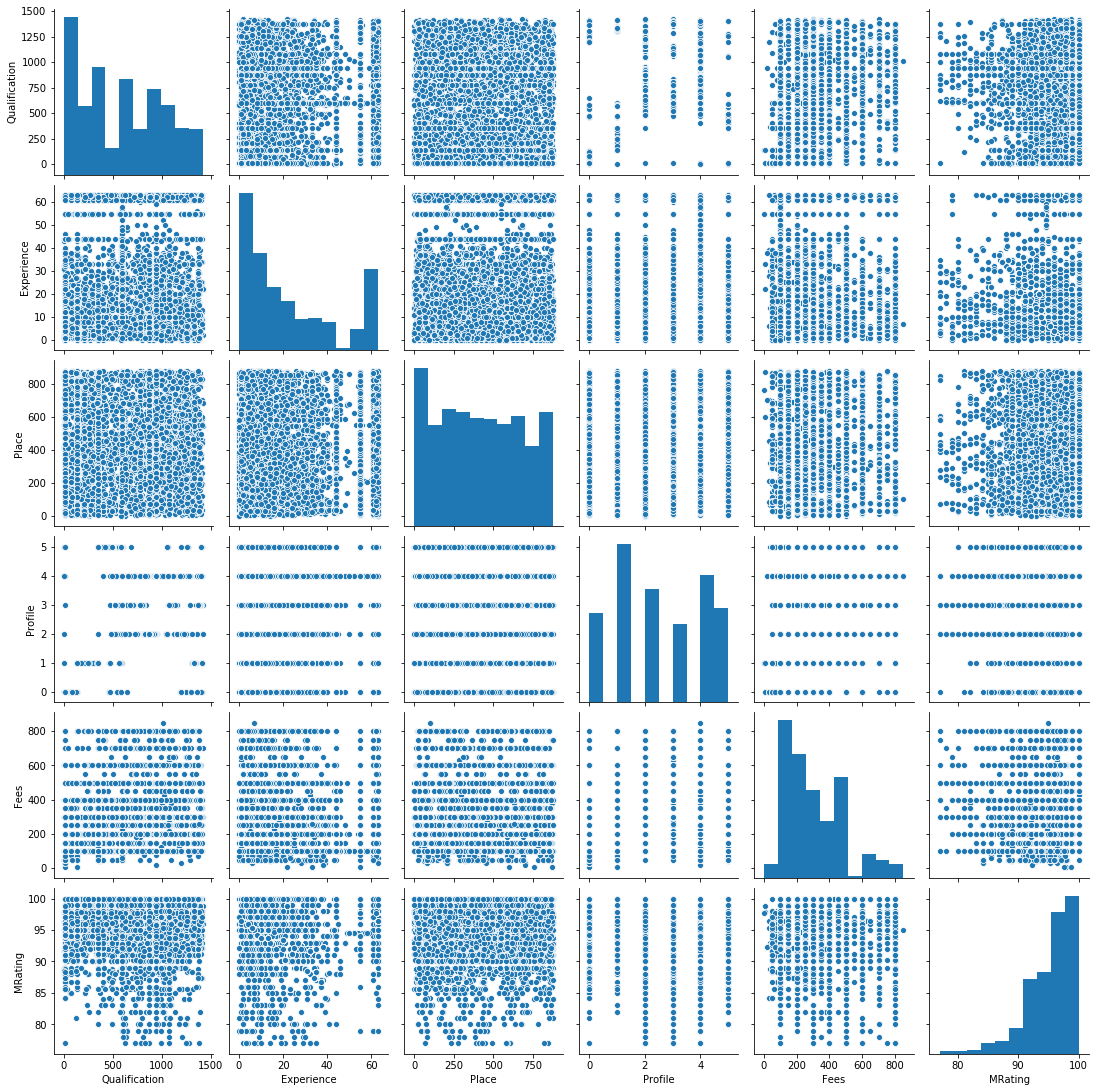

In [39]:
sns.pairplot(df1)

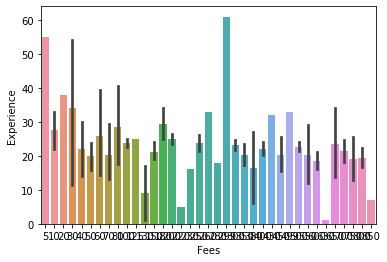

In [87]:
# the fees is basically mean around 20-30 years of experience
sns.barplot(df1['Fees'],df1['Experience'])

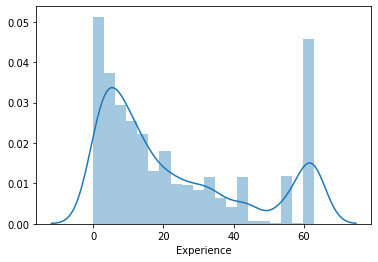

In [89]:
sns.distplot(df1['Experience'])

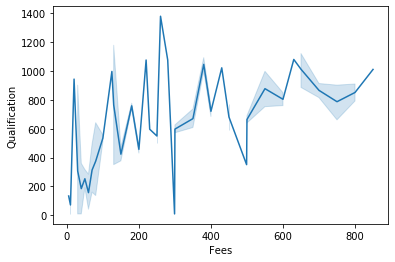

In [92]:
# as the qualification is increasing fees also tend to increase
sns.lineplot(df1['Fees'],df1['Qualification'])

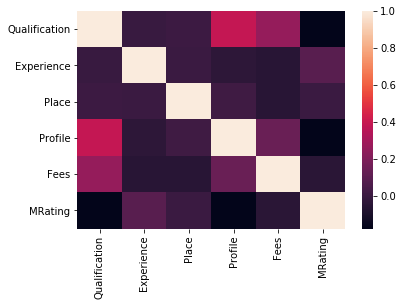

In [40]:
# most of the attributes are highly non correlated
sns.heatmap(df1.corr())

Qualification       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Experience       AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Place            AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Profile          AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Fees             AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
MRating          AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
dtype: object

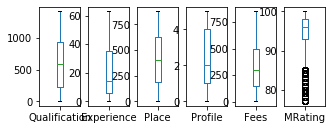

In [41]:
df1.plot(kind='box',subplots=True,layout=(2,7))

In [42]:
X = df1.drop('Fees',axis=1)
y = df1['Fees']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# we will be using the regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [45]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
# defined a function for evaluating the model using RMSEL (Root Mean Squared Error Log)
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

In [93]:
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy Score of',m, 'is: ')
    print(mean_absolute_error(y_test,predm))
    print(mean_squared_error(y_test,predm))
    print(np.sqrt(mean_squared_error(y_test,predm)))
    print(score(predm,y_test))
    print(r2_score(y_test,predm))

Accuracy Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 
147.2042514924567
32588.03014543403
180.5215503629249
0.7701066115158842
0.0667964775847778
Accuracy Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 
181.85684539302446
60126.15981259761
245.20636168867563
0.6193094215308397
-0.7217961280877951
Accuracy Score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) is: 
144.61845440928963
34202.05384299629
184.9379729611966
0.7864916126095256
0.020576666411632027
Accuracy Score of K

In [49]:
dtc = DecisionTreeRegressor()
params = {'criterion': ['mse','mae'],'splitter':['best','random']}
gscv = GridSearchCV(dtc,param_grid=params)
gscv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'splitter': ['best', 'random']},
             pre_dispatch='2*n_jobs', re

In [50]:
gscv.best_params_

{'criterion': 'mae', 'splitter': 'random'}

In [51]:
dtc=DecisionTreeRegressor(criterion='mae',splitter='random')
dtc.fit(X_train,y_train)
dtcpred=dtc.predict(X_test)
dtcpred

array([400., 250., 700., ..., 500., 200., 100.])

In [52]:
print(score(predm,y_test))

0.7647033062689743


In [53]:
r2_score(y_test,dtcpred)

-0.4684087876791261

In [54]:
cvs = cross_val_score(DecisionTreeRegressor(criterion='mae',splitter='random'),X,y,cv=50)
cvs

array([-0.10385698, -0.06962954, -0.30107401, -0.70436094, -0.42261969,
       -0.38768173, -0.50804371, -0.522993  , -0.50978375, -0.46511953,
       -0.19932115, -0.54984759, -0.22671376, -0.17756341, -0.81631159,
       -0.93985938, -0.46712535, -0.55818318, -0.70424854, -0.58150178,
       -0.42730166, -0.25811106, -0.47609295, -0.24086875, -0.61829802,
       -0.50927436, -0.51134286, -0.44733549, -0.69059213, -0.41988285,
       -0.60988202, -0.18696945, -0.4469767 , -0.34495493, -0.18281538,
       -0.60982863, -0.18071304, -0.56743179, -0.69741131, -0.19784973,
       -0.61225664,  0.08357088, -0.50416714, -0.40878993, -0.4575221 ,
       -0.19702121, -0.56819095, -0.00792789,  0.08080981, -0.30202474])

In [55]:
cvs.mean()

-0.41466583228983106

In [56]:
cvs.max()

0.08357088419492165

In [57]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lrpred = lr.predict(X_test)
lrpred

array([358.17622948, 308.95700909, 308.0262287 , ..., 318.93167827,
       316.94408791, 404.51541207])

In [58]:
r2_score(y_test,lrpred)

0.0667964775847778

In [59]:
cvs = cross_val_score(LinearRegression(),X,y,cv=50)
cvs

array([ 3.96230422e-02,  8.36859124e-02,  8.24369852e-02, -6.51637155e-03,
        5.09358970e-02,  8.33541605e-02,  6.69620457e-02,  3.72446338e-02,
        8.88369082e-02,  6.04775577e-02,  1.98651456e-01,  1.11554394e-01,
        1.42474311e-01,  2.81892775e-02, -3.67716013e-02,  5.25543464e-02,
        7.90801725e-02, -1.73015449e-02, -1.39559776e-04,  9.61728546e-02,
        1.48538558e-01,  7.04547876e-02,  4.65311873e-02,  5.01695107e-02,
        1.27778374e-01,  7.09111144e-02,  1.00193726e-01,  5.01305679e-02,
       -2.58180289e-02,  5.40867438e-02,  7.75833848e-02,  4.46298926e-02,
        3.47630319e-02,  7.75756586e-02,  1.42605179e-01,  4.89457820e-02,
        5.17119970e-02,  2.52375129e-02,  1.04925162e-01,  8.13008405e-02,
        2.96800381e-02,  1.32818854e-01, -4.75876676e-02,  1.19984317e-01,
        7.23699894e-02,  8.59463966e-02,  1.00807613e-01,  5.69345082e-02,
        8.04222936e-02,  4.03268469e-02])

In [60]:
cvs.mean()

0.06590926097791051

In [61]:
cvs.max()

0.19865145580650023

In [62]:
svr= SVR()
svr.fit(X_train,y_train)
svrpred = svr.predict(X_test)
svrpred

array([328.45048083, 264.14044166, 289.26638239, ..., 295.28805514,
       262.9430204 , 311.02390131])

In [63]:
params = {'C':[0.0001,0.001,0.01,0.1,1,10],'gamma':[0.1,1,10,100]}
gscv = GridSearchCV(svr,param_grid=params)
gscv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
gscv.best_params_

{'C': 10, 'gamma': 0.1}

In [65]:
svr= SVR(C=10,gamma=0.1,kernel='rbf')
svr.fit(X_train,y_train)
svrpred = svr.predict(X_test)
svrpred

array([288.37876387, 288.37876387, 288.15710422, ..., 288.37876481,
       288.37876387, 288.37876387])

In [66]:
print(score(svrpred,y_test))

0.765263556514149


In [94]:
print(r2_score(y_test,svrpred))

-0.0006639951662292809


In [ ]:
svr= SVR(C=10,gamma=0.1,kernel='poly')
svr.fit(X_train,y_train)
svrpred = svr.predict(X_test)
svrpred

In [ ]:
print(score(svrpred,y_test))

In [ ]:
svr= SVR(C=10,gamma=0.1,kernel='linear')
svr.fit(X_train,y_train)
svrpred = svr.predict(X_test)
svrpred

In [ ]:
print(score(svrpred,y_test))

In [67]:
cvs = cross_val_score(SVR(C=10,gamma=0.1),X,y,cv=50)
cvs

array([ 0.00782989, -0.00736476, -0.02545672, -0.00571118,  0.02091568,
       -0.00044826, -0.00686425, -0.00404268,  0.01012294,  0.00611066,
        0.01668244, -0.03774576,  0.00720331,  0.00617272, -0.0008553 ,
        0.00685259, -0.02446436, -0.03366136,  0.00480569, -0.00465645,
       -0.03527781, -0.01725574,  0.00170568,  0.00553194,  0.00142827,
        0.0079247 ,  0.00127877,  0.006302  ,  0.01369924,  0.00587116,
       -0.01106085,  0.02109326, -0.01709197,  0.00160181, -0.00738862,
       -0.00357347,  0.00391627, -0.00433744, -0.07717337,  0.01218927,
       -0.04784161, -0.00908461,  0.0132676 ,  0.01844457, -0.03266309,
        0.00286279,  0.01686636,  0.0134834 ,  0.0108809 , -0.0052547 ])

In [68]:
cvs.mean()

-0.003484608819678918

In [69]:
cvs.max()

0.021093261512814876

In [70]:
knn = KNeighborsRegressor()
params = {'n_neighbors': range(1,50)}
rscv = RandomizedSearchCV(knn,param_distributions=params)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=5,
                                                 p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': range(1, 50)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [71]:
rscv.best_params_

{'n_neighbors': 47}

In [72]:
knn=KNeighborsRegressor(n_neighbors=47)
knn.fit(X_train,y_train)
knnpred=knn.predict(X_test)
knnpred

array([365.42553191, 315.31914894, 284.04255319, ..., 369.14893617,
       281.91489362, 345.74468085])

In [73]:
print(score(knnpred,y_test))

0.7781187531007576


In [95]:
print(r2_score(y_test,knnpred))

0.09312907399029946


In [74]:
cvs = cross_val_score(KNeighborsRegressor(n_neighbors=47),X,y,cv=50)
cvs

array([ 0.12189434,  0.11129315,  0.09818686, -0.0324961 ,  0.10332547,
        0.08516137,  0.05386077,  0.06782846,  0.14008692,  0.1091952 ,
        0.26542848,  0.11166468,  0.17339201,  0.08790213,  0.00105479,
        0.05255202,  0.0441577 ,  0.02690277,  0.14273156,  0.05902219,
        0.11260429,  0.13886796,  0.07328783,  0.13395072,  0.13408791,
        0.13023507,  0.10176925,  0.11589213,  0.06456766,  0.07763909,
        0.19167719,  0.10526184,  0.0520434 ,  0.14729506,  0.23110922,
        0.02154492,  0.04206396, -0.02811511,  0.1146821 ,  0.12246097,
        0.03928644,  0.14429115, -0.04894937,  0.17758446,  0.08123305,
        0.17975808,  0.10258959,  0.04852176,  0.06688659,  0.08536373])

In [75]:
cvs.mean()

0.09565271449020185

In [76]:
cvs.max()

0.26542847509400025

In [78]:
ad=AdaBoostRegressor(n_estimators=50,base_estimator=SVR())
ad.fit(X_train,y_train)
predad=ad.predict(X_test)

In [79]:
print(score(predad,y_test))

0.7545806234120114


In [96]:
print(r2_score(y_test,predad))

0.06943049114342925


In [80]:
rfr = RandomForestRegressor(criterion='mae')
rfr.fit(X_train,y_train)
rfrpred = rfr.predict(X_test)
rfrpred

array([329. , 357.5, 277.9, ..., 393.5, 298.5, 413.5])

In [81]:
print(score(predad,y_test))

0.7545806234120114


In [97]:
print(r2_score(y_test,rfrpred))

0.1283694560497447


In [82]:
gbr= GradientBoostingRegressor()
gbr.fit(X_train,y_train)
gbrpred = gbr.predict(X_test)
gbrpred

array([345.12108048, 324.12318811, 244.32276913, ..., 424.09598333,
       309.63712244, 408.57129091])

In [83]:
print(score(gbrpred,y_test))

0.7998104701840822


In [98]:
print(r2_score(y_test,gbrpred))

0.1773464688400277


In [86]:
# we can see that GradientBoostingRegressor has the best accuracy of almost 80%
from sklearn.externals import joblib

joblib.dump(gbr,'consfeesgbrfile.obj')
gbr_from_joblib=joblib.load('consfeesgbrfile.obj')
gbr_from_joblib.predict(X_test)

array([345.12108048, 324.12318811, 244.32276913, ..., 424.09598333,
       309.63712244, 408.57129091])